In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math

In [2]:
%matplotlib inline

In [3]:
sat_data_orig = pd.read_csv("satact-campus-data-class-2020.csv")
cam_data_orig = pd.read_csv("campus-analyze-2019-20.csv")

- sat_data_orig: SAT Data acquired from TEA
- cam_data_orig: Campus Data (High School, Middle School, Elementary) acquired from TEA

In [4]:
sat_data_orig.head()

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
0,All Students,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<25,31.7,<25,NaN,<25,30.8
1,African American,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
2,American Indian,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
3,Asian,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
4,Hispanic,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,33.3,<25,NaN,<25,NaN


In [5]:
cam_data_orig.head()

,Campus Name,Campus,Campus Type,Campus Type Description
0,21ST CENTURY EARLY LEARNING FOUNDATIONS ACADEMY,108913118,21,Suburb: Large
1,3D ACADEMY,108902006,21,Suburb: Large
2,A & M CONS H S,21901001,12,City: Midsize
3,A & M CONSOLIDATED MIDDLE,21901042,12,City: Midsize
4,A B DUNCAN EL,77901101,41,Rural: Fringe


## Classifications for Schools
* 11 – City-Large: Territory inside an Urbanized Area and inside a Principal City with population of 250,000 or more.
"
* 12 – City-Midsize: Territory inside an Urbanized Area and inside a Principal City with population less than 250,000 and greater than or equal to 100,000.
* 13 – City-Small: Territory inside an Urbanized Area and inside a Principal City with population less than 100,000.
* 21 – Suburban-Large: Territory outside a Principal City and inside an Urbanized Area with population of 250,000 or more.
* 22 – Suburban-Midsize: Territory outside a Principal City and inside an Urbanized Area with population less than 250,000 and greater than or equal to 100,000.
* 23 – Suburban-Small: Territory outside a Principal City and inside an Urbanized Area with population less than 100,000.
* 31 – Town-Fringe: Territory inside an Urban Cluster that is less than or equal to 10 miles from an Urbanized Area.  
* 32 – Town-Distant: Territory inside an Urban Cluster that is more than 10 miles and less than or equal to 35 miles from an Urbanized Area.
* 33 – Town-Remote: Territory inside an Urban Cluster that is more than 35 miles from an Urbanized Area.
* 41 – Rural-Fringe: Census-defined rural territory that is less than or equal to 5 miles from an Urbanized Area, as well as rural territory that is less than or equal to 2.5 miles from an Urban Cluster.
* 42 – Rural-Distant: Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an Urbanized Area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an Urban Cluster.
* 43 – Rural-Remote: Census-defined rural territory that is more than 25 miles from an Urbanized Area and also more than 10 miles from an Urban Cluster.

## Dividing Schools into above categories

In [6]:
large_city_schools = cam_data_orig[cam_data_orig["Campus Type"] == 11]
large_city_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
11,A LEAL JR MIDDLE,15904042,11,City: Large
13,A M PATE EL,220905153,11,City: Large
17,A V CATO EL,220917101,11,City: Large
18,A+ ACADEMY EL,57829001,11,City: Large
19,A+ SECONDARY SCHOOL,57829002,11,City: Large


In [7]:
large_city_schools.count()

Campus Name                2437
Campus                     2437
Campus Type                2437
Campus Type Description    2437
dtype: int64

In [8]:
mid_city_schools = cam_data_orig[cam_data_orig["Campus Type"] == 12]
mid_city_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
2,A & M CONS H S,21901001,12,City: Midsize
3,A & M CONSOLIDATED MIDDLE,21901042,12,City: Midsize
26,ABELL J H,165901047,12,City: Midsize
31,ABILENE H S,221901001,12,City: Midsize
37,ACADEMY FOR TECHNOLOGY ENGINEERING MATH & SCIENCE,221901010,12,City: Midsize


In [9]:
mid_city_schools.count()

Campus Name                695
Campus                     695
Campus Type                695
Campus Type Description    695
dtype: int64

In [10]:
small_city_schools = cam_data_orig[cam_data_orig["Campus Type"] == 13]
small_city_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
88,ALAMO EL,101911101,13,City: Small
115,ALFONSO RAMIREZ EL,108904129,13,City: Small
179,ALTON BOWEN EL,21902117,13,City: Small
198,AMADOR R RODRIGUEZ JUVENILE BOOT CAMP,31912005,13,City: Small
220,ANDERSON EL,170902101,13,City: Small


In [11]:
small_city_schools.count()

Campus Name                376
Campus                     376
Campus Type                376
Campus Type Description    376
dtype: int64

In [12]:
large_sub_schools = cam_data_orig[cam_data_orig["Campus Type"] == 21]
large_sub_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
0,21ST CENTURY EARLY LEARNING FOUNDATIONS ACADEMY,108913118,21,Suburb: Large
1,3D ACADEMY,108902006,21,Suburb: Large
10,A G ELDER EL,126905103,21,Suburb: Large
12,A M OCHOA EL,108902104,21,Suburb: Large
14,A N RICO EL,108913113,21,Suburb: Large


In [13]:
large_sub_schools.count()

Campus Name                1920
Campus                     1920
Campus Type                1920
Campus Type Description    1920
dtype: int64

In [14]:
mid_sub_schools = cam_data_orig[cam_data_orig["Campus Type"] == 22]
mid_sub_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
83,AIM CENTER H S,181907002,22,Suburb: Midsize
97,ALBERT & IOLA LEE DAVIS MALVERN EL,43907118,22,Suburb: Midsize
159,ALTER SCH,123908002,22,Suburb: Midsize
164,ALTERNATIVE EDUCATION SCHOOL,123905002,22,Suburb: Midsize
239,ANGELA GERUSA LEAL EL,31912117,22,Suburb: Midsize


In [15]:
mid_sub_schools.count()

Campus Name                265
Campus                     265
Campus Type                265
Campus Type Description    265
dtype: int64

In [16]:
small_sub_schools = cam_data_orig[cam_data_orig["Campus Type"] == 23]
small_sub_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
15,A P BEUTEL EL,20905102,23,Suburb: Small
241,ANGLETON J H SCHOOL,20902044,23,Suburb: Small
586,BELTON EARLY CHILDHOOD SCHOOL,14903119,23,Suburb: Small
587,BELTON H S,14903001,23,Suburb: Small
588,BELTON MIDDLE,14903046,23,Suburb: Small


In [17]:
small_sub_schools.count()

Campus Name                55
Campus                     55
Campus Type                55
Campus Type Description    55
dtype: int64

In [18]:
town_fringe_schools = cam_data_orig[cam_data_orig["Campus Type"] == 31]
town_fringe_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
6,A C BLUNT MIDDLE,205901041,31,Town: Fringe
28,ABERNATHY EL,95901101,31,Town: Fringe
29,ABERNATHY H S,95901001,31,Town: Fringe
30,ABERNATHY MIDDLE,95901041,31,Town: Fringe
84,AIM COLLEGE & CAREER PREP,84902007,31,Town: Fringe


In [19]:
town_fringe_schools.count()

Campus Name                222
Campus                     222
Campus Type                222
Campus Type Description    222
dtype: int64

In [20]:
town_distant_schools = cam_data_orig[cam_data_orig["Campus Type"] == 32]
town_distant_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
7,A C JONES H S,13901001,32,Town: Distant
8,A C JONES HEALTH PROFESSIONS MAGNET ACADEMY,13901004,32,Town: Distant
49,ACTON EL,111901102,32,Town: Distant
58,ADAMS MIDDLE,125901043,32,Town: Distant
82,AIKMAN EL,59901101,32,Town: Distant


In [21]:
town_distant_schools.count()

Campus Name                502
Campus                     502
Campus Type                502
Campus Type Description    502
dtype: int64

In [22]:
town_remote_schools = cam_data_orig[cam_data_orig["Campus Type"] == 33]
town_remote_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
5,A B MCBAY EL,147903103,33,Town: Remote
27,ABERNATHY DAEP,95901003,33,Town: Remote
81,AIKIN EL,139909109,33,Town: Remote
147,ALPINE EL,22901101,33,Town: Remote
148,ALPINE H S,22901001,33,Town: Remote


In [23]:
town_remote_schools.count()

Campus Name                362
Campus                     362
Campus Type                362
Campus Type Description    362
dtype: int64

In [24]:
rural_fringe_schools = cam_data_orig[cam_data_orig["Campus Type"] == 41]
rural_fringe_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
4,A B DUNCAN EL,77901101,41,Rural: Fringe
9,A E BUTLER INT,116908101,41,Rural: Fringe
36,ACADEMY EL,14901102,41,Rural: Fringe
38,ACADEMY H S,14901001,41,Rural: Fringe
39,ACADEMY INT,14901101,41,Rural: Fringe


In [25]:
rural_fringe_schools.count()

Campus Name                1107
Campus                     1107
Campus Type                1107
Campus Type Description    1107
dtype: int64

In [26]:
rural_distant_schools = cam_data_orig[cam_data_orig["Campus Type"] == 42]
rural_distant_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
22,AARON PARKER EL,139911102,42,Rural: Distant
25,ABBOTT SCHOOL,109901001,42,Rural: Distant
74,AGUA DULCE EL,178901101,42,Rural: Distant
75,AGUA DULCE H S,178901001,42,Rural: Distant
86,AKIN EL,95903102,42,Rural: Distant


In [27]:
rural_distant_schools.count()

Campus Name                764
Campus                     764
Campus Type                764
Campus Type Description    764
dtype: int64

In [28]:
rural_remote_schools = cam_data_orig[cam_data_orig["Campus Type"] == 43]
rural_remote_schools.head()

,Campus Name,Campus,Campus Type,Campus Type Description
63,ADRIAN SCHOOL,180903001,43,Rural: Remote
96,ALBANY JR-SR H S,209901001,43,Rural: Remote
341,ASPERMONT EL,217901101,43,Rural: Remote
342,ASPERMONT H S,217901001,43,Rural: Remote
387,AUSTIN EL,96904101,43,Rural: Remote


In [29]:
rural_remote_schools.count()

Campus Name                394
Campus                     394
Campus Type                394
Campus Type Description    394
dtype: int64

In [30]:
print(" Large City: ",len (large_city_schools),"\n Midsize City: ", len(mid_city_schools),"\n Small City: ", len(small_city_schools),"\n Large Suburb: ", len(large_sub_schools),"\n Midsize Suburb: ", len(mid_sub_schools), "\n Small Suburb: ",len(small_sub_schools), "\n Town Fringe: ", len(town_fringe_schools), "\n Town Distant: ", len(town_distant_schools),"\n Town Remote: ", len(town_remote_schools), "\n Rural Fringe: ", len(rural_fringe_schools), "\n Rural Distant: ", len(rural_distant_schools),"\n Rural Remote: ", len(rural_remote_schools))

 Large City:  2437 
 Midsize City:  695 
 Small City:  376 
 Large Suburb:  1920 
 Midsize Suburb:  265 
 Small Suburb:  55 
 Town Fringe:  222 
 Town Distant:  502 
 Town Remote:  362 
 Rural Fringe:  1107 
 Rural Distant:  764 
 Rural Remote:  394


In [31]:
len (large_city_schools)+len(mid_city_schools)+len(small_city_schools)+len(large_sub_schools)+len(mid_sub_schools)+len(small_sub_schools)+len(town_fringe_schools)+len(town_distant_schools)+len(town_remote_schools)+len(rural_fringe_schools)+len(rural_distant_schools)+len(rural_remote_schools)

9099

# Sample Size for Each School Type (High Schools Only)

In [116]:
print("Large City: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["large_city"]==True])/1792)))
print("Midsize City: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["mid_city"]==True])/1792)))
print("Small City: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["small_city"]==True])/1792)))
print("Large Suburb: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["large_sub"]==True])/1792)))
print("Midsize Suburb: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["mid_sub"]==True])/1792)))
print("Small Suburb: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["small_sub"]==True])/1792)))
print("Town Fringe: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["town_fringe"]==True])/1792)))
print("Town Distant: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["town_distant"]==True])/1792)))
print("Town Remote: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["town_remote"]==True])/1792)))
print("Rural Fringe: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["rural_fringe"]==True])/1792)))
print("Rural Distant: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["rural_distant"]==True])/1792)))
print("Rural Remote: ", math.ceil(900*(0.5*len(sat_data_selected[sat_data_selected["rural_remote"]==True])/1792)))
print("Total Sample Size: ",192+54+27+138+17+5+19+52+37+114+144+102)

Large City:  192
Midsize City:  54
Small City:  27
Large Suburb:  138
Midsize Suburb:  17
Small Suburb:  5
Town Fringe:  19
Town Distant:  52
Town Remote:  37
Rural Fringe:  114
Rural Distant:  144
Rural Remote:  102
Total Sample Size:  901


In [33]:
sat_data_orig.head()

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
0,All Students,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<25,31.7,<25,NaN,<25,30.8
1,African American,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
2,American Indian,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
3,Asian,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,NaN,<25,NaN,<25,NaN
4,Hispanic,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,33.3,<25,NaN,<25,NaN


In [34]:
list_of_campuses = sat_data_orig["Campus"].unique()

In [35]:
sat_data_selected = sat_data_orig[(sat_data_orig["Group"] == "Gifted") | (sat_data_orig["Group"] == "Not Gifted")]
sat_data_selected.head()

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
21,Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,NaN,<25,75.0
22,Not Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<25,24.3,<25,NaN,<25,11.1
78,Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,75.0,<25,75.0
79,Not Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,<100,<75,57.3,<25,9.8,<25,23.5
135,Gifted,1904001,442590,Frankston H S,1904,Frankston ISD,1,Anderson County,7,Kilgore,<25,<25,83.3,<25,60.0,<25,60.0


In [36]:
school_types = {
    "large_city": large_city_schools["Campus"],
    "mid_city": mid_city_schools["Campus"],
    "small_city": small_city_schools["Campus"],
    "large_sub": large_sub_schools["Campus"],
    "mid_sub": mid_sub_schools["Campus"],
    "small_sub": small_sub_schools["Campus"],
    "town_fringe": town_fringe_schools["Campus"],
    "town_distant": town_distant_schools["Campus"],
    "town_remote": town_remote_schools["Campus"],
    "rural_fringe": rural_fringe_schools["Campus"],
    "rural_distant": rural_distant_schools["Campus"],
    "rural_remote": rural_remote_schools["Campus"]
}

In [37]:
sat_data_selected.head()

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
21,Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,NaN,<25,75.0
22,Not Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,<50,<25,24.3,<25,NaN,<25,11.1
78,Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,<25,<25,100.0,<25,75.0,<25,75.0
79,Not Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,<100,<75,57.3,<25,9.8,<25,23.5
135,Gifted,1904001,442590,Frankston H S,1904,Frankston ISD,1,Anderson County,7,Kilgore,<25,<25,83.3,<25,60.0,<25,60.0


In [38]:
sat_data_selected["large_city"] = sat_data_selected["Campus"].isin(school_types["large_city"])
sat_data_selected["mid_city"] = sat_data_selected["Campus"].isin(school_types["mid_city"])
sat_data_selected["small_city"] = sat_data_selected["Campus"].isin(school_types["small_city"])
sat_data_selected["large_sub"] = sat_data_selected["Campus"].isin(school_types["large_sub"])
sat_data_selected["mid_sub"] = sat_data_selected["Campus"].isin(school_types["mid_sub"])
sat_data_selected["small_sub"] = sat_data_selected["Campus"].isin(school_types["small_sub"])
sat_data_selected["town_fringe"] = sat_data_selected["Campus"].isin(school_types["town_fringe"])
sat_data_selected["town_distant"] = sat_data_selected["Campus"].isin(school_types["town_distant"])
sat_data_selected["town_remote"] = sat_data_selected["Campus"].isin(school_types["town_remote"])
sat_data_selected["rural_fringe"] = sat_data_selected["Campus"].isin(school_types["rural_fringe"])
sat_data_selected["rural_distant"] = sat_data_selected["Campus"].isin(school_types["rural_distant"])
sat_data_selected["rural_remote"] = sat_data_selected["Campus"].isin(school_types["rural_remote"])
sat_data_selected.head()

/var/folders/vm/qg92d4j56_l5x0q4g9hbq4j80000gn/T/ipykernel_57343/3883165323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_data_selected["large_city"] = sat_data_selected["Campus"].isin(school_types["large_city"])
/var/folders/vm/qg92d4j56_l5x0q4g9hbq4j80000gn/T/ipykernel_57343/3883165323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_data_selected["mid_city"] = sat_data_selected["Campus"].isin(school_types["mid_city"])
/var/folders/vm/qg92d4j56_l5x0q4g9hbq4j80000gn/T/ipykernel_57343/38831

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,...,small_city,large_sub,mid_sub,small_sub,town_fringe,town_distant,town_remote,rural_fringe,rural_distant,rural_remote
21,Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,False,False,False,False,False,False,False,False,False,True
22,Not Gifted,1902001,441165,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,...,False,False,False,False,False,False,False,False,False,True
78,Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,...,False,False,False,False,False,False,False,False,True,False
79,Not Gifted,1903001,442190,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,...,False,False,False,False,False,False,False,False,True,False
135,Gifted,1904001,442590,Frankston H S,1904,Frankston ISD,1,Anderson County,7,Kilgore,...,False,False,False,False,False,False,False,False,True,False


In [39]:
test = sat_data_selected[sat_data_selected["large_city"] == True].sample(n=20, random_state=42)

test_gifted = sat_data_selected[sat_data_selected["Group"] == "Gifted"]
test_not_gifted = sat_data_selected[sat_data_selected["Group"] == "Not Gifted"]

test_gifted.sample(n=5, random_state=42)

,Group,Campus,AICode,CampName,District,DistName,County,CntyName,Region,RegnName,...,small_city,large_sub,mid_sub,small_sub,town_fringe,town_distant,town_remote,rural_fringe,rural_distant,rural_remote
35817,Gifted,72801137,442939,Premier H S Of Granbury,72801,Premier High Schools,72,Erath County,11,Fort Worth,...,False,False,False,False,False,True,False,False,False,False
12561,Gifted,30906001,441370,Eula H S,30906,Eula ISD,30,Callahan County,14,Abilene,...,False,False,False,False,False,False,False,False,True,False
60270,Gifted,114904001,442475,Forsan H S,114904,Forsan ISD,114,Howard County,18,Midland,...,False,False,False,False,False,False,False,False,True,False
24987,Gifted,57905034,441732,Booker T Washington Spva Magnet,57905,Dallas ISD,57,Dallas County,10,Richardson,...,False,False,False,False,False,False,False,False,False,False
83925,Gifted,212804102,440019,Ut Tyler University Academy At Lon,212804,Ut Tyler University Academy,212,Smith County,7,Kilgore,...,True,False,False,False,False,False,False,False,False,False


# Samples of Various Schools 
    * _sample denotes GT students
    * _sample_2 denotes NON GT students

## City Schools

In [40]:
large_city_sample = sat_data_selected[(sat_data_selected["large_city"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=192, random_state=42,replace=False)
large_city_sample_2 = sat_data_selected[(sat_data_selected["large_city"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=192, random_state=42,replace=False)

In [41]:
mid_city_sample = sat_data_selected[(sat_data_selected["mid_city"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=54, random_state=42,replace=False)
mid_city_sample_2 = sat_data_selected[(sat_data_selected["mid_city"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=54, random_state=42,replace=False)

In [42]:
small_city_sample = sat_data_selected[(sat_data_selected["small_city"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=27, random_state=42,replace=False)
small_city_sample_2 = sat_data_selected[(sat_data_selected["small_city"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=27, random_state=42,replace=False)

## Suburb Schools

In [43]:
large_sub_sample = sat_data_selected[(sat_data_selected["large_sub"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=138, random_state=42,replace=False)
large_sub_sample_2 = sat_data_selected[(sat_data_selected["large_sub"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=138, random_state=42,replace=False)

In [44]:
mid_sub_sample = sat_data_selected[(sat_data_selected["mid_sub"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=17, random_state=42,replace=False)
mid_sub_sample_2 = sat_data_selected[(sat_data_selected["mid_sub"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=17, random_state=42,replace=False)

In [45]:
small_sub_sample = sat_data_selected[(sat_data_selected["small_sub"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=5, random_state=42,replace=False)
small_sub_sample_2 = sat_data_selected[(sat_data_selected["small_sub"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=5, random_state=42,replace=False)

## Town Schools

In [46]:
town_fringe_sample = sat_data_selected[(sat_data_selected["town_fringe"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=19, random_state=42,replace=False)
town_fringe_sample_2 = sat_data_selected[(sat_data_selected["town_fringe"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=19, random_state=42,replace=False)

In [47]:
town_distant_sample = sat_data_selected[(sat_data_selected["town_distant"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=52, random_state=42,replace=False)
town_distant_sample_2 = sat_data_selected[(sat_data_selected["town_distant"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=52, random_state=42,replace=False)

In [48]:
town_remote_sample = sat_data_selected[(sat_data_selected["town_remote"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=37, random_state=42,replace=False)
town_remote_sample_2 = sat_data_selected[(sat_data_selected["town_remote"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=37, random_state=42,replace=False)

## Rural Schools

In [49]:
rural_fringe_sample = sat_data_selected[(sat_data_selected["rural_fringe"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=114, random_state=42,replace=False)
rural_fringe_sample_2 = sat_data_selected[(sat_data_selected["rural_fringe"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=114, random_state=42,replace=False)

In [50]:
rural_distant_sample = sat_data_selected[(sat_data_selected["rural_distant"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=144, random_state=42,replace=False)
rural_distant_sample_2 = sat_data_selected[(sat_data_selected["rural_distant"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=144, random_state=42,replace=False)

In [51]:
rural_remote_sample = sat_data_selected[(sat_data_selected["rural_remote"] == True) & (sat_data_selected["Group"] == "Gifted")].sample(n=102, random_state=42,replace=False)
rural_remote_sample_2 = sat_data_selected[(sat_data_selected["rural_remote"] == True) & (sat_data_selected["Group"] == "Not Gifted")].sample(n=102, random_state=42,replace=False)

In [52]:
gifted_samples = [large_city_sample,mid_city_sample, small_city_sample,large_sub_sample,mid_sub_sample,small_sub_sample,town_fringe_sample,town_distant_sample,town_remote_sample,rural_fringe_sample,rural_distant_sample,rural_remote_sample]
overall_gifted_sample = pd.concat(gifted_samples)

# Complete Sample
    * combines City, Suburb, Town, and Rural to obtain representative sample

In [53]:
not_gifted_samples = [large_city_sample_2,mid_city_sample_2, small_city_sample_2,large_sub_sample_2,mid_sub_sample_2,small_sub_sample_2,town_fringe_sample_2,town_distant_sample_2,town_remote_sample_2,rural_fringe_sample_2,rural_distant_sample_2,rural_remote_sample_2]
overall_not_gifted_sample = pd.concat(not_gifted_samples)

## Participation Rate
    * Number of graduates taking the SAT and/or ACT

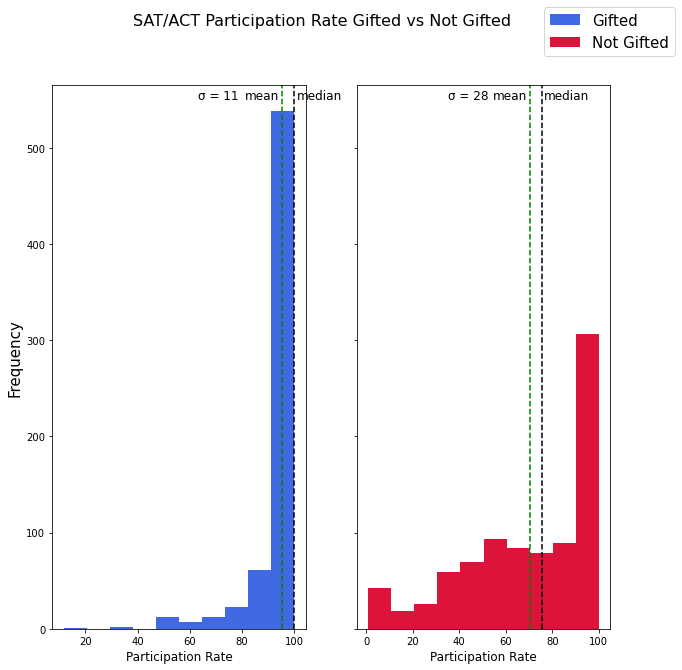

In [214]:
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2, sharey=True, figsize=(10,10))
ax0.hist(overall_gifted_sample["Part_Rate"], color="royalblue")
ax1.hist(overall_not_gifted_sample["Part_Rate"], color="crimson");
fig.legend(["Gifted", "Not Gifted"], prop={'size':15});
fig.suptitle("SAT/ACT Participation Rate Gifted vs Not Gifted", fontsize=16)
ax0.set_xlabel("Participation Rate", fontsize=12)
ax1.set_xlabel("Participation Rate", fontsize=12)
ax0.set_ylabel("Frequency", fontsize=15);

ax0.axvline(x=overall_gifted_sample["Part_Rate"].median(),linestyle="dashed", color="black")
ax0.text(overall_gifted_sample["Part_Rate"].median()+1, 550, "median",fontsize=12)
ax0.axvline(x=overall_gifted_sample["Part_Rate"].mean(),linestyle="dashed", color="green")
ax0.text(overall_gifted_sample["Part_Rate"].mean()-14, 550, "mean",fontsize=12)
ax0.text(63, 550, 'σ = {}'.format(round(overall_gifted_sample["Part_Rate"].std())), fontsize=12)

ax1.axvline(x=overall_not_gifted_sample["Part_Rate"].median(),linestyle="dashed", color="black")
ax1.text(overall_not_gifted_sample["Part_Rate"].median()+1, 550, "median",fontsize=12)
ax1.axvline(x=overall_not_gifted_sample["Part_Rate"].mean(),linestyle="dashed", color="green")
ax1.text(overall_not_gifted_sample["Part_Rate"].mean()-16, 550, "mean",fontsize=12)
ax1.text(35, 550, 'σ = {}'.format(round(overall_not_gifted_sample["Part_Rate"].std())), fontsize=12);

fig.savefig("images/Participation Rate.png", facecolor="white")

## Metrics for Participation Rate

In [136]:
print("----Gifted Metrics----")
overall_gifted_sample["Part_Rate"].describe()

----Gifted Metrics----


count    656.000000
mean      95.173323
std       10.963787
min       11.800000
25%       96.325000
50%      100.000000
75%      100.000000
max      100.000000
Name: Part_Rate, dtype: float64

In [109]:
print("----Not Gifted Metrics----")
overall_not_gifted_sample["Part_Rate"].describe()

----Not Gifted Metrics----


count    866.000000
mean      70.216397
std       28.234094
min        0.800000
25%       50.925000
50%       75.550000
75%       98.400000
max      100.000000
Name: Part_Rate, dtype: float64

## Above Criteria Rate
    * Percent of graduating examinees scoring at or above 1180 (SAT total) or 24 (ACT composite)

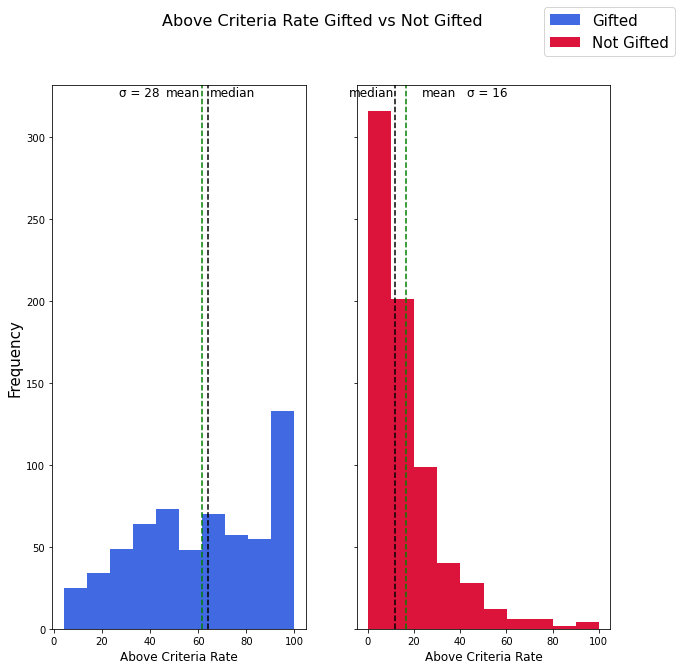

In [215]:
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2, sharey=True, figsize=(10,10))
ax0.hist(overall_gifted_sample["Above_Crit_Rate"], color="royalblue")
ax1.hist(overall_not_gifted_sample["Above_Crit_Rate"], color="crimson");
fig.legend(["Gifted", "Not Gifted"], prop={'size':15});
fig.suptitle("Above Criteria Rate Gifted vs Not Gifted", fontsize=16)
ax0.set_xlabel("Above Criteria Rate", fontsize=12)
ax1.set_xlabel("Above Criteria Rate", fontsize=12)
ax0.set_ylabel("Frequency", fontsize=15);

ax0.axvline(x=overall_gifted_sample["Above_Crit_Rate"].median(),linestyle="dashed", color="black")
ax0.text(overall_gifted_sample["Above_Crit_Rate"].median()+1, 325, "median",fontsize=12)
ax0.axvline(x=overall_gifted_sample["Above_Crit_Rate"].mean(),linestyle="dashed", color="green")
ax0.text(overall_gifted_sample["Above_Crit_Rate"].mean()-15, 325, "mean",fontsize=12)
ax0.text(27, 325, 'σ = {}'.format(round(overall_gifted_sample["Above_Crit_Rate"].std())), fontsize=12)

ax1.axvline(x=overall_not_gifted_sample["Above_Crit_Rate"].median(),linestyle="dashed", color="black")
ax1.text(overall_not_gifted_sample["Above_Crit_Rate"].median()-20, 325, "median",fontsize=12)
ax1.axvline(x=overall_not_gifted_sample["Above_Crit_Rate"].mean(),linestyle="dashed", color="green")
ax1.text(overall_not_gifted_sample["Above_Crit_Rate"].mean()+7, 325, "mean",fontsize=12)
ax1.text(43, 325, 'σ = {}'.format(round(overall_not_gifted_sample["Above_Crit_Rate"].std())), fontsize=12);

fig.savefig("images/Above Criteria Rate.png", facecolor="white")

## Metrics for Above Criteria Rate

In [112]:
print("----Gifted Metrics----")
overall_gifted_sample["Above_Crit_Rate"].describe()

----Gifted Metrics----


count    608.000000
mean      61.788487
std       27.797117
min        4.200000
25%       39.475000
50%       63.950000
75%       85.825000
max      100.000000
Name: Above_Crit_Rate, dtype: float64

In [113]:
print("----Not Gifted Metrics----")
overall_not_gifted_sample["Above_Crit_Rate"].describe()

----Not Gifted Metrics----


count    714.000000
mean      16.636275
std       15.946278
min        0.300000
25%        5.700000
50%       11.800000
75%       21.950000
max      100.000000
Name: Above_Crit_Rate, dtype: float64

## Above TSI Both Rate
    * Percent of graduating examinees scoring at or above 1180 (SAT total) or 24 (ACT composite)

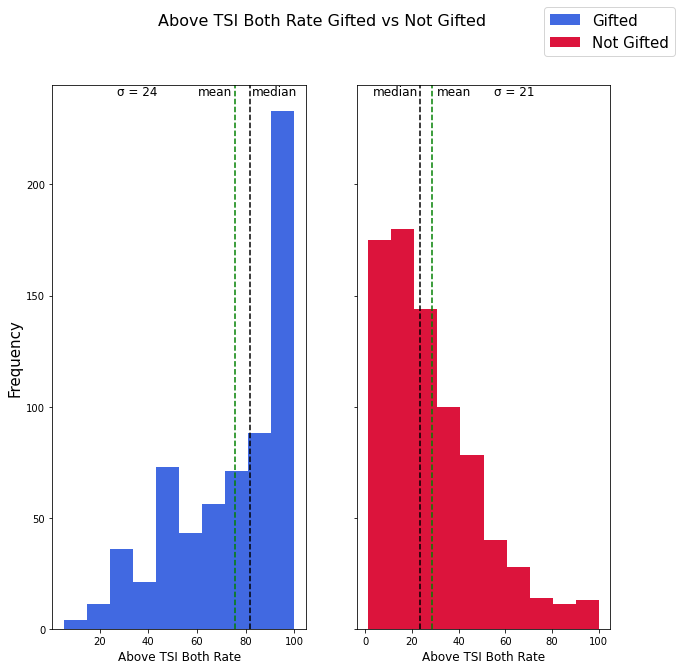

In [216]:
fig, (ax0, ax1) = plt.subplots(nrows =1, ncols = 2, sharey=True, figsize=(10,10))
ax0.hist(overall_gifted_sample["Above_TSI_Both_Rate"], color="royalblue")
ax1.hist(overall_not_gifted_sample["Above_TSI_Both_Rate"], color="crimson");
fig.legend(["Gifted", "Not Gifted"], prop={'size':15});
fig.suptitle("Above TSI Both Rate Gifted vs Not Gifted", fontsize=16)
ax0.set_xlabel("Above TSI Both Rate", fontsize=12)
ax1.set_xlabel("Above TSI Both Rate", fontsize=12)
ax0.set_ylabel("Frequency", fontsize=15);

ax0.axvline(x=overall_gifted_sample["Above_TSI_Both_Rate"].median(),linestyle="dashed", color="black")
ax0.text(overall_gifted_sample["Above_TSI_Both_Rate"].median()+1, 240, "median",fontsize=12)
ax0.axvline(x=overall_gifted_sample["Above_TSI_Both_Rate"].mean(),linestyle="dashed", color="green")
ax0.text(overall_gifted_sample["Above_TSI_Both_Rate"].mean()-15, 240, "mean",fontsize=12)
ax0.text(27, 240, 'σ = {}'.format(round(overall_gifted_sample["Above_TSI_Both_Rate"].std())), fontsize=12)

ax1.axvline(x=overall_not_gifted_sample["Above_TSI_Both_Rate"].median(),linestyle="dashed", color="black")
ax1.text(overall_not_gifted_sample["Above_TSI_Both_Rate"].median()-20, 240, "median",fontsize=12)
ax1.axvline(x=overall_not_gifted_sample["Above_TSI_Both_Rate"].mean(),linestyle="dashed", color="green")
ax1.text(overall_not_gifted_sample["Above_TSI_Both_Rate"].mean()+2, 240, "mean",fontsize=12)
ax1.text(55, 240, 'σ = {}'.format(round(overall_not_gifted_sample["Above_TSI_Both_Rate"].std())), fontsize=12);

fig.savefig("images/Above TSI Both Rate.png", facecolor="white")

## Metrics for Above TSI Both Rate

In [114]:
print("----Gifted Metrics----")
overall_gifted_sample["Above_TSI_Both_Rate"].describe()

----Gifted Metrics----


count    636.000000
mean      75.493868
std       23.683728
min        5.300000
25%       57.100000
50%       81.700000
75%      100.000000
max      100.000000
Name: Above_TSI_Both_Rate, dtype: float64

In [115]:
print("----Not Gifted Metrics----")
overall_not_gifted_sample["Above_TSI_Both_Rate"].describe()

----Not Gifted Metrics----


count    783.000000
mean      28.515709
std       20.842003
min        1.300000
25%       12.400000
50%       23.400000
75%       38.650000
max      100.000000
Name: Above_TSI_Both_Rate, dtype: float64